Definer T som antall prikker på en seksidet terning 2T og som antall prikker på to sekssidede ternigner. 

1. Et av utfallsrommene T og 2T har uniform sannsynlighet og det andre ikke uniform sannsynlihet. Forklar hva det betyr og hvorfor det er slik. Tegn opp grafen for f(T),f(2T) og den kumulative sannsynlighetsfordelingen F(2T), F(T)?

For en terning T så har alle utfallene lik sannsynlighet $\frac{1}{6}$. For to terninger 2T har ikke alle utfallene lik sannsynlighet. Det er feks seks utfall som gir syv prikker $\frac{6}{36}$, men bare et utfall som gir to prikker $\frac{1}{36}$. Derfor sier vi at T er en uniform sannsynlighet, mens T er en ikke uniform sannsynlighet.

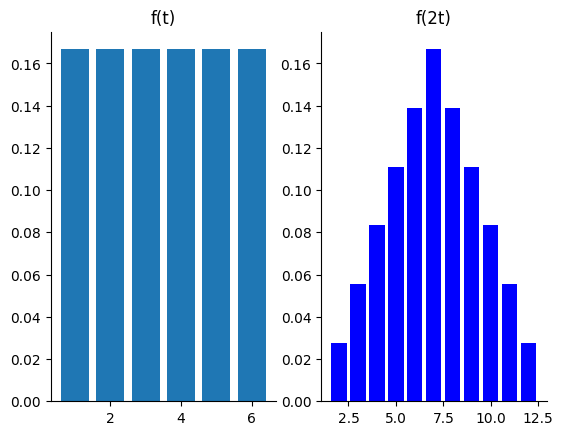

In [165]:
import matplotlib.pyplot as plt
import numpy as np

x_t = [1,2,3,4,5,6]

p_x_t = 1/6

fig, ax = plt.subplots(1,2)
ax[0].bar(x_t, p_x_t)
ax[0].spines['top'].set_color('none')
ax[0].spines['right'].set_color('none')
ax[0].set_title('f(t)')

sum_probs = {sum: 0 for sum in range(2, 13)}
for die1 in range(1, 7):
    for die2 in range(1, 7):
        sum_probs[die1 + die2] += 1

# Normaliserer sannsynligheter
total_outcomes = 6 * 6  # Totalt antall mulige utfall (6 for hver terning)
for sum in sum_probs:
    sum_probs[sum] /= total_outcomes

# Plotter fordelingen
utfall = list(sum_probs.keys())
sannsynlighet = list(sum_probs.values())

ax[1].spines['top'].set_color('none')
ax[1].spines['right'].set_color('none')
ax[1].bar(utfall, sannsynlighet, color='blue')
ax[1].set_title('f(2t)');


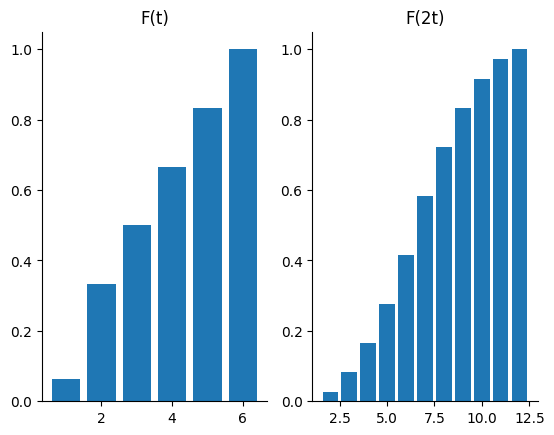

In [166]:
kumulativ_sannsynlighet_x_t = [1/16,2/6,3/6,4/6,5/6,6/6]
fig, ax = plt.subplots(1, 2)
ax[0].bar(x_t,kumulativ_sannsynlighet_x_t)
ax[0].spines['top'].set_color('none')
ax[0].spines['right'].set_color('none')
ax[0].set_title('F(t)')

# Beregner sannsynligheter for hver mulig sum av to terninger
sum_probs = {sum: 0 for sum in range(2, 13)}
for die1 in range(1, 7):
    for die2 in range(1, 7):
        sum_probs[die1 + die2] += 1

# Normaliserer sannsynligheter
total_outcomes = 6 * 6  # Totalt antall mulige utfall (6 for hver terning)
for sum in sum_probs:
    sum_probs[sum] /= total_outcomes

# Kumulative sannsynligheter
cumulative_sums = np.cumsum(list(sum_probs.values()))

# Plotter den kumulative fordelingen
sums = list(sum_probs.keys())

ax[1].bar(sums, cumulative_sums)
ax[1].spines['top'].set_color('none')
ax[1].spines['right'].set_color('none')
ax[1].set_title('F(2t)');

2. Kan du regne ut korrelasjon, kovarians, varians og standardavik for T og 2T?

In [167]:
mean_t = (1+2+3+4+5+6)/6

varians_t = 1/6*((1-3.5)**2+(2-3.5)**2+(3-3.5)**2+(4-3.5)**2+(5-3.5)**2+(6-3.5)**2)

print(f'Variansen til en terning t er:')
varians_t

Variansen til en terning t er:


2.9166666666666665

At variansen er 2,92 i konteksten av en terning betyr at den gjennomsnittlige kvadrerte avviket fra middelverdien (3,5 i dette tilfellet) av utfallene er 2,92. Variansen gir et matematisk mål på spredningen eller variabiliteten av utfallene rundt deres gjennomsnitt.

In [168]:
mean_2t = 3.5 + 3.5

varians_2t = 1/36*(2-7)**2+2/36*(3-7)**2+3/36*(4-7)**2+4/36*(5-7)**2+5/36*(6-7)**2+6/36*(7-7)**2+5/36*(8-7)**2+4/36*(9-7)**2+3/36*(10-7)**2+2/36*(11-7)**2+1/36*(12-7)**2

varians_2t

5.833333333333334

At variansen er 5,83 betyr at for 2T så er det gjennomsnittlige kvadrerte avviket fra gjennomsnittet (7 i dette tilfellet) av alle utfallene 5,83. Gir et mattematisk mål på spredningen. 

In [169]:
import math

print(f'Standard avviket til en terning T er lik:')
std_avvik_t = math.sqrt(varians)
std_avvik_t

Standard avviket til en terning T er lik:


1.707825127659933

In [170]:
print(f'Standard avviket til to terninger 2T er lik:')
std_avvik_2t = math.sqrt(varians_2t)
std_avvik_2t

Standard avviket til to terninger 2T er lik:


2.41522945769824

In [181]:
terning_t = np.array([1,2,3,4,5,6])

terning_2t = np.array([7,8,9,10,11,12])

cov_t_2t = np.sum((terning_t - mean_t) * (terning_2t - mean_2t)) / (len(terning_t) - 1)

print(f'Kovarians er lik: ')
display(cov_t_2t)

korrelasjon = cov_t_2t/(std_avvik_t*std_avvik_2t)
print(f'Korrelasjon er lik: ')
korrelasjon

Kovarians er lik: 


3.5

Korrelasjon er lik: 


0.848528137423857

3. Kan du lage en grafisk fremmstilling fra to utfallsrom til T til ett utfallsrom med 2T. Tips er å bruke piler.

Dersom to hendelser A og B er uavhengige hendelser holder det at P(AB) = P(A)P(B). Les som og, altså settet av A og B.

In [172]:
from IPython.display import Markdown

tbl=f"""
|       | **1** | **2** | **3** | **4** | **5** | **6** |
|-------|-------|-------|-------|-------|:-----:|-------|
| **1** | 2     | 3     | 4     | 5     | 6     | 7     |
| **2** | 3     | 4     | 5     | 6     | 7     | 8     |
| **3** | 4     | 5     | 6     | 7     | 8     | 9     |
| **4** | 5     | 6     | 7     | 8     | 9     | 10    |
| **5** | 6     | 7     | 8     | 9     | 10    | 11    |
| **6** | 7     | 8     | 9     | 10    | 11    | 12    |
"""

display(Markdown(tbl))


|       | **1** | **2** | **3** | **4** | **5** | **6** |
|-------|-------|-------|-------|-------|:-----:|-------|
| **1** | 2     | 3     | 4     | 5     | 6     | 7     |
| **2** | 3     | 4     | 5     | 6     | 7     | 8     |
| **3** | 4     | 5     | 6     | 7     | 8     | 9     |
| **4** | 5     | 6     | 7     | 8     | 9     | 10    |
| **5** | 6     | 7     | 8     | 9     | 10    | 11    |
| **6** | 7     | 8     | 9     | 10    | 11    | 12    |


4. For to terningkast, hva er sannsynligheten for å observere at to terninger er like, t1 = t2 definer dette som
P(A)? Hva er sannsynligheten for å observere at summen er mellom 7 og 10 definer dette som P(B)? Hva er
sannsynligheten for å observere at summen er 2, 7 eller 8 definer dette som P(C). Hva er sannsynligheten for at alle
tre A B og C skal skje i.e P(A ∩ B ∩ C)? Hva er sannsynligheten for P(A ∩ B)? Kan du forklare hvorfor du får
svarene?

Sannsyligheten for at to kast er,$ T^1 = T^2 $. Vi kaller dette for $ P(A) $, da er $ P(A) = \frac{1}{6} \times \frac{1}{6} = \frac{1}{36} $. Sannsyligheten for å kaste to like terninger blir dermed $ P(A) = 2.7 $ %. 

For finne $ P(B) $ må vi først finne hvor mange utfall som gir mellom seks og ti prikker. 6 kombinasjoner gir 7 prikker, 5 kombinasjoner gir 8 prikker, 4 kombinasjoner 9 prikker og 3 kombinasjoner gir 10 prikker. Summen av disse er $ \frac{6}{36} + \frac{5}{36} + \frac{4}{36}  + \frac{3}{36} = \frac{18}{36}. $ Sannsynligheten for at summen er mellom 7 og 10 eller $ P(B) = 50 $ %.

Sannsynligheten for å observere 2,7 eller 8 kaller vi for $ P(C) $ og er $ \frac{1}{36} + \frac{6}{36} + \frac{5}{36} = \frac{12}{36} $. Sannsynligheten for å observere 2,7 eller 8, $ P(C) = 33 $ %.

Sannsynlighet for $ P(A) \times P(B) \times P(C)  = \frac{1}{6} \times \frac{1}{6} \times  \frac{6}{36} + \frac{5}{36} + \frac{4}{36}  + \frac{3}{36}   \times \frac{1}{36} + \frac{6}{36} + \frac{5}{36} = 0.04 $ %. 

Sannsynlighet for $ P(A) \times P(B) =  \frac{1}{6} \times \frac{1}{6} \times  \frac{6}{36} + \frac{5}{36} + \frac{4}{36}  + \frac{3}{36} =  1,3 $ %.